In [1]:
pip install ../../

Processing /home/mehdi/Straph
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
  Created wheel for straph: filename=straph-0.3-py3-none-any.whl size=123595 sha256=6662f082f7cbbfd3504e2716ceb53f5af32c4265ac67d01423ce7f0a35855b19
  Stored in directory: /tmp/pip-ephem-wheel-cache-flfthvjw/wheels/b5/a9/15/900863b02cb736e4f08449e03d1d2d6ad447e06de70afc5fed
Successfully built straph
  Attempting uninstall: straph
    Found existing installation: straph 0.3
    Uninstalling straph-0.3:
      Successfully uninstalled straph-0.3
You should consider upgrading via the '/home/mehdi/sage_github/sage/bin/python3 -m pip install --upgrade pip' command.
Note: yo

In [1]:
import straph as sg
import pandas as pd
import matplotlib.pyplot as plt
import straph.betweenness as bt
import numpy

In [2]:
plt.rcParams["figure.figsize"] = (12,9)

In [3]:
nb_erdos = 8

In [4]:
path_directory = "examples/"
S = sg.read_stream_graph(path_nodes=path_directory + "erdos"+str(nb_erdos)+"_nodes.sg",
                      path_links=path_directory + "erdos"+ str(nb_erdos)+ "_links.sg")
S.describe()

Nb of Nodes :  12
Nb of segmented nodes :  12.0
Nb of links :  46
Nb of segmented links :  80.0
Nb of event times :  64


In [5]:
bt.to_undirected(S)

<AxesSubplot:xlabel='t', ylabel='Nodes'>

findfont: Font family ['Garamond'] not found. Falling back to DejaVu Sans.


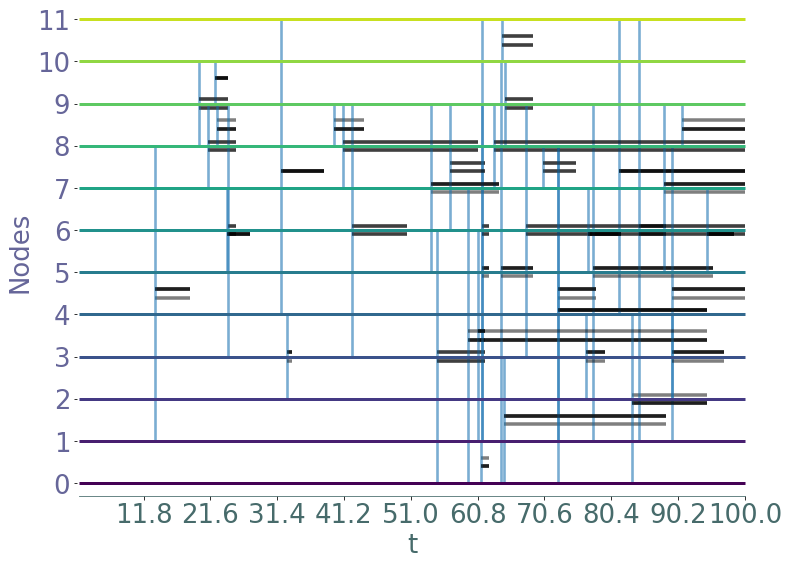

In [6]:
S.plot()

In [7]:
SS = S.stream_graph_to_link_stream()

In [8]:
SS.write_to_matthieu_link_stream("erdos" + str(nb_erdos))

In [13]:
betweenness, general_contri, nouveau, events, sigma_r, latency, prev_next , contri, before, after, deltasvvt, no_succ ,features = bt.betweenness_all(SS)

In [14]:
bt.simulations(SS, "papier")

In [15]:
bet_moi = bt.read_dictionary("papier_betweenness.pic")

In [16]:
import os
cmd = 'mv erdos'+str(nb_erdos)+'_mat.ls archive_code/Test'
os.system(cmd)

256

In [17]:
import os
cmd = 'python2 archive_code/betweenness_all.py Test/erdos'+str(nb_erdos)+'_mat.ls -1 res'
os.system(cmd)

0

In [18]:
bet_mat = bt.read_dictionary("res_betweenness.pic")

In [19]:
bet_mat.keys()

dict_keys(['11', '10', '1', '0', '3', '2', '5', '4', '7', '6', '9', '8'])

In [20]:
bet_moi.keys()

dict_keys(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11'])

In [21]:
for v in bet_moi.keys():
    for t in bet_moi[v].keys():
        if (v.lower() in bet_mat ):
            if not (abs(bet_moi[v][t] - bet_mat[v.lower()][t]) < 1/100):
                print("erreur ",v,t,"=>   ", bet_moi[v][t], bet_mat[v.lower()][t])

erreur  2 79.42609013671806 =>    3949.5209118172 3961.866805006257
erreur  4 79.42609013671806 =>    3949.5209118172 3961.866805006257
erreur  4 81.584398652186 =>    7109.982540359579 7122.328433548633
erreur  4 81.83786850826748 =>    3608.790692397849 3621.1365855869053
erreur  4 83.43201144567504 =>    4130.348961813867 4142.694855002925
erreur  4 84.42937459514606 =>    337.42026207505654 349.5196755548277


In [30]:
#contribution check
node = 3

In [31]:
import os
cmd = 'python2 archive_code/betweenness_tout.py Test/erdos'+str(nb_erdos)+'_mat.ls -1 ' + S.node_to_label[node].lower() + " cont"
print (cmd)
os.system(cmd)

python2 archive_code/betweenness_tout.py Test/erdos9_mat.ls -1 2 cont


0

In [32]:
cont_mat = bt.read_dictionary("cont_contri.pic")

In [33]:
for v in general_contri[node].keys():
    for t in general_contri[node][v].keys():
        if S.node_to_label[v].lower() in cont_mat:
            if abs(general_contri[node][v][t].val - cont_mat[S.node_to_label[v].lower()][t]) > 1/100:
                print("erreur ",v,t,"=>   ", "(",general_contri[node][v][t].dim,general_contri[node][v][t].val,")" ,cont_mat[S.node_to_label[v].lower()][t])

erreur  4 84.42937459514606 =>    ( 0 24.198826959542323 ) 36.29824043931348
erreur  4 83.43201144567504 =>    ( 0 3579.511656016481 ) 3591.857549205538
erreur  4 81.83786850826748 =>    ( 0 3595.356883048983 ) 3607.70277623804
erreur  4 81.584398652186 =>    ( 0 3949.5209118172 ) 3961.866805006257
erreur  4 79.42609013671806 =>    ( 0 3949.5209118172 ) 3961.866805006257
erreur  2 79.42609013671806 =>    ( 0 3949.5209118172 ) 3961.866805006257


In [23]:
SS.write_to_sg("examples/erdos2")

In [126]:
SS.alpha

1.1308940848602123

In [127]:
SS.omega

100